In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [40]:
irisdf=pd.read_csv("/content/IRIS.csv")

In [41]:
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
irisdf.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
irisdf['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [45]:
irisdf.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [46]:
irisdf.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

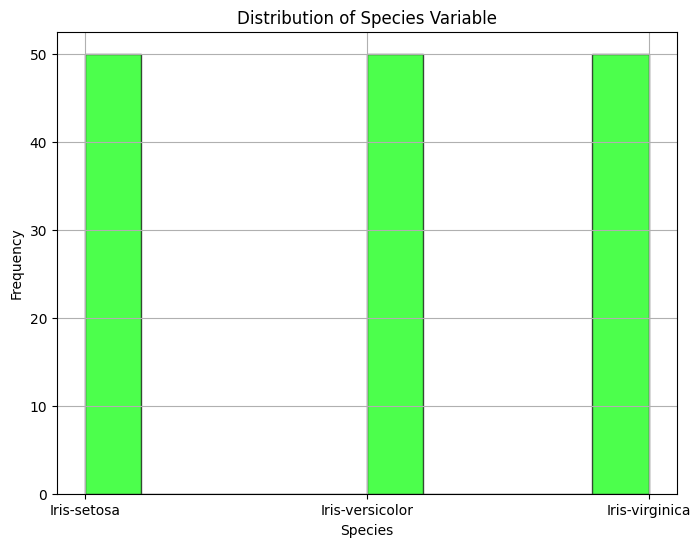

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(irisdf['species'], alpha=0.7, color='lime', edgecolor='black')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Distribution of Species Variable')
plt.grid(True)
plt.show()

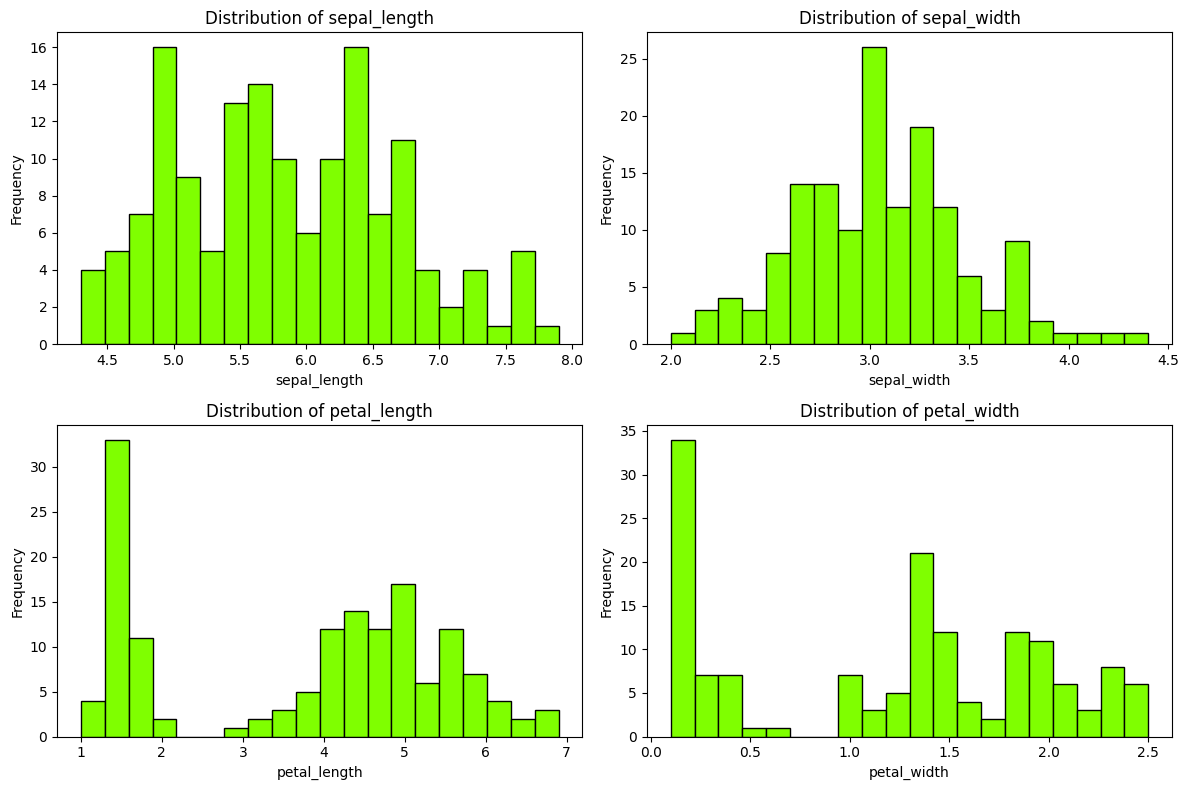

In [48]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(irisdf.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    plt.hist(irisdf[feature], bins=20, color='chartreuse', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

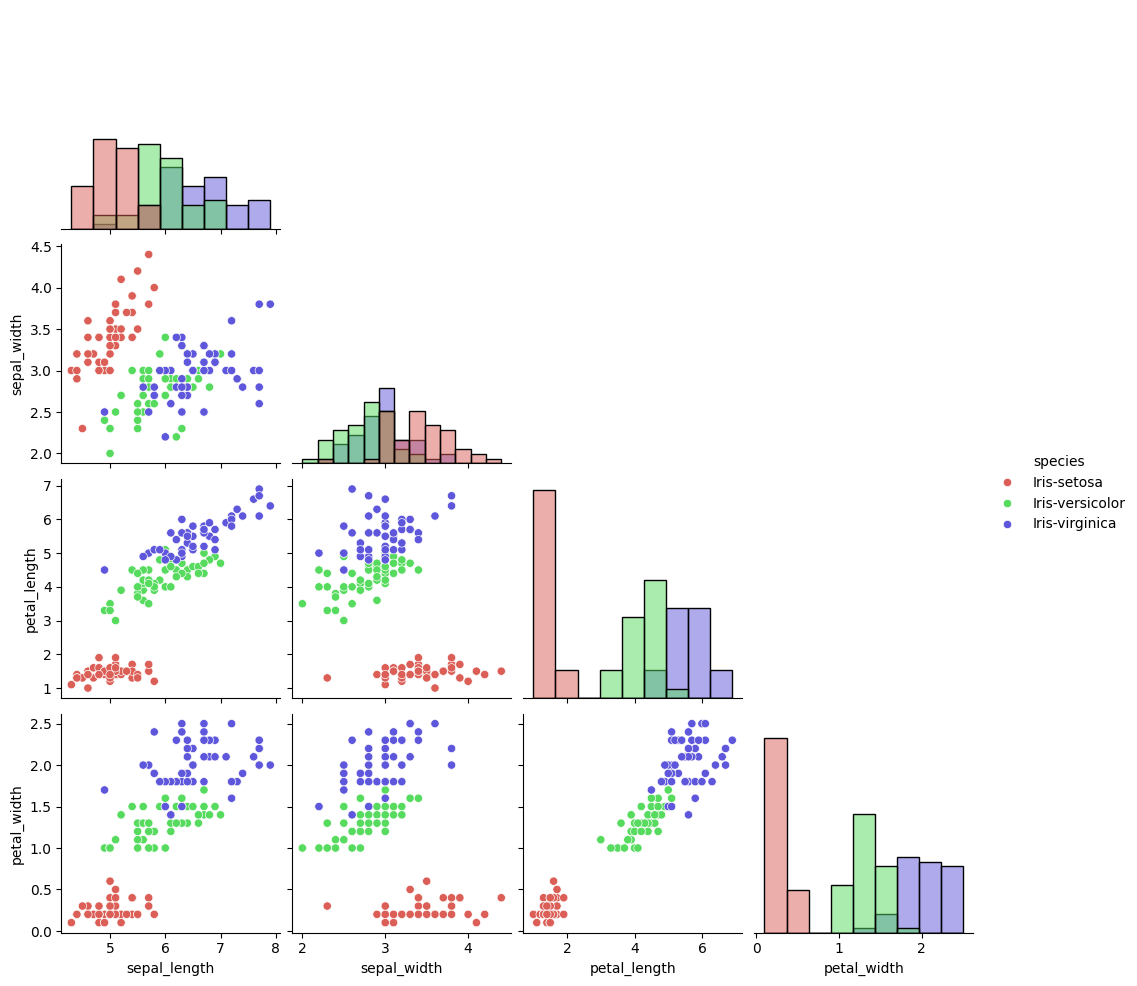

In [49]:
import seaborn as sns
sns.pairplot(irisdf, hue='species', diag_kind="hist", corner=True, palette='hls')

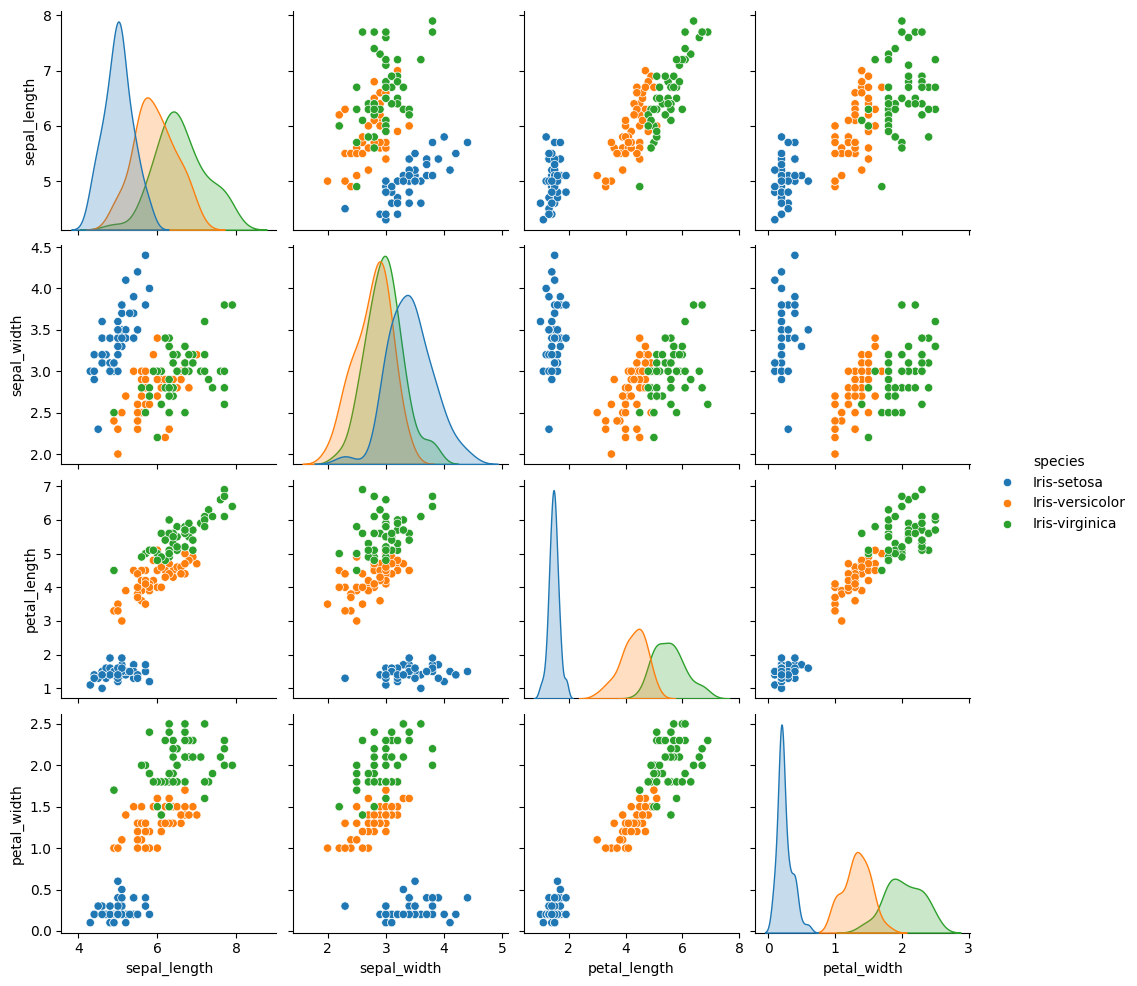

In [50]:
sns.pairplot(irisdf, hue='species')
plt.show()

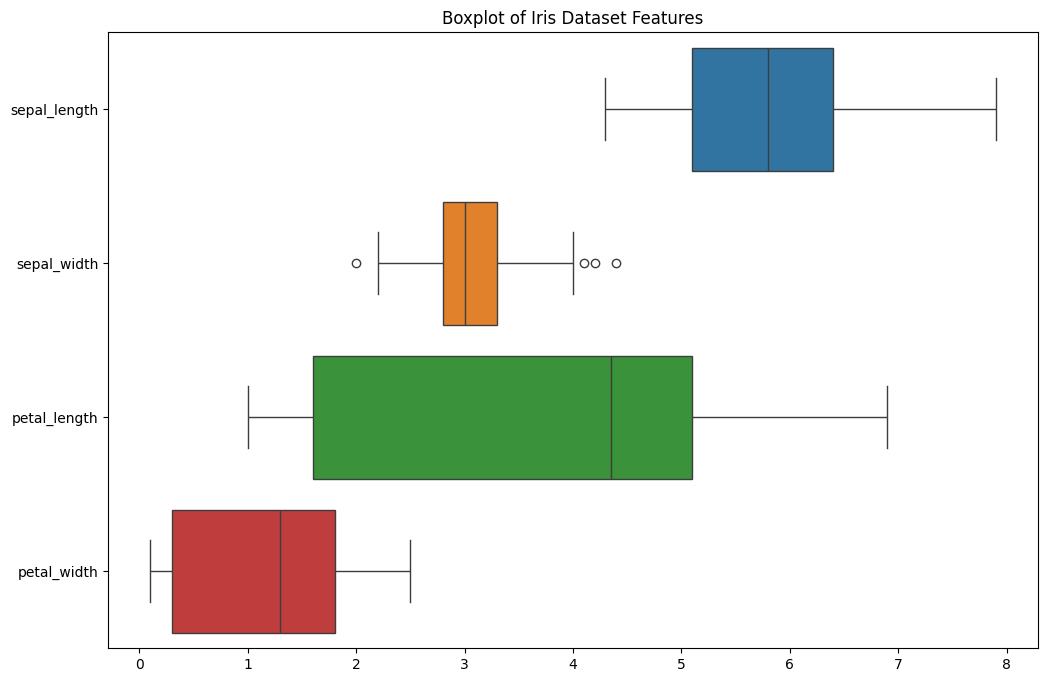

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=irisdf, orient='h')
plt.title('Boxplot of Iris Dataset Features')
plt.show()

In [52]:
numeric_cols=irisdf.drop('species', axis=1)

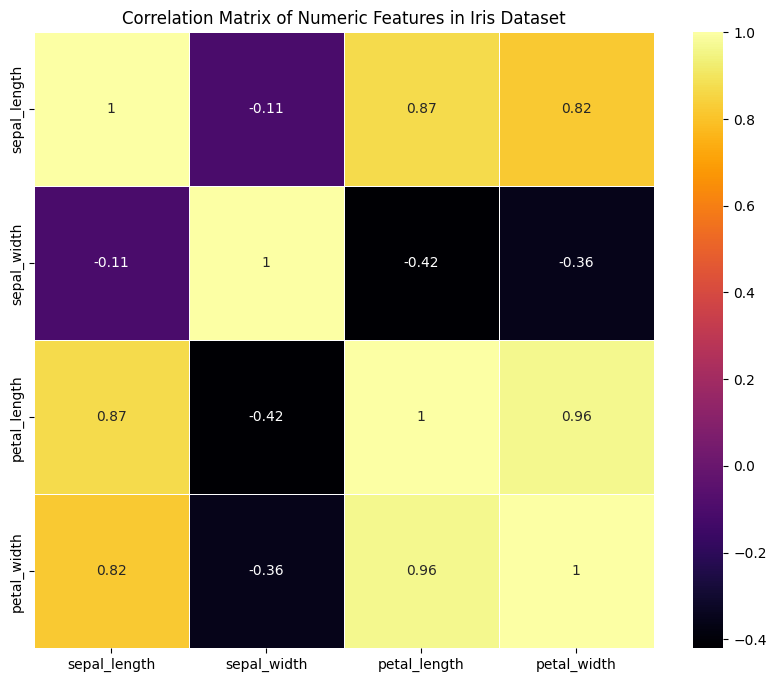

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='inferno', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features in Iris Dataset')
plt.show()

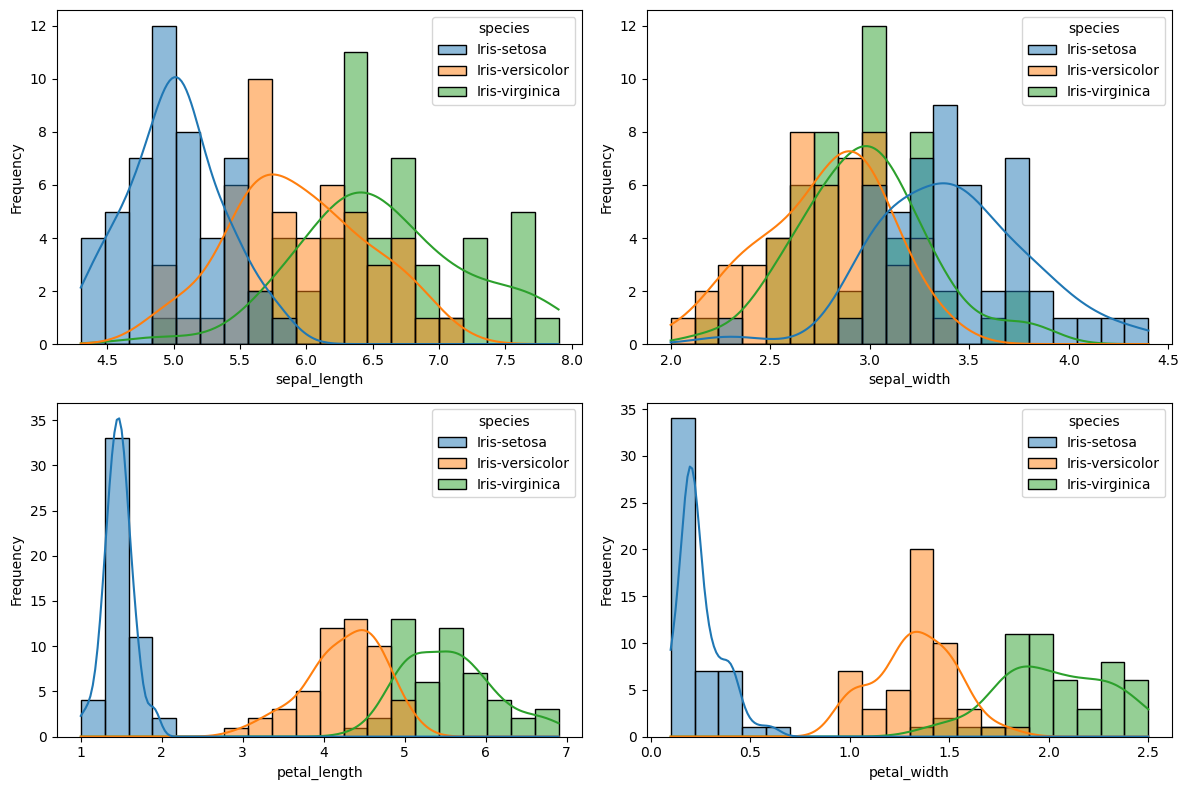

In [54]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(irisdf.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=irisdf, x=feature, hue='species', kde=True, bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

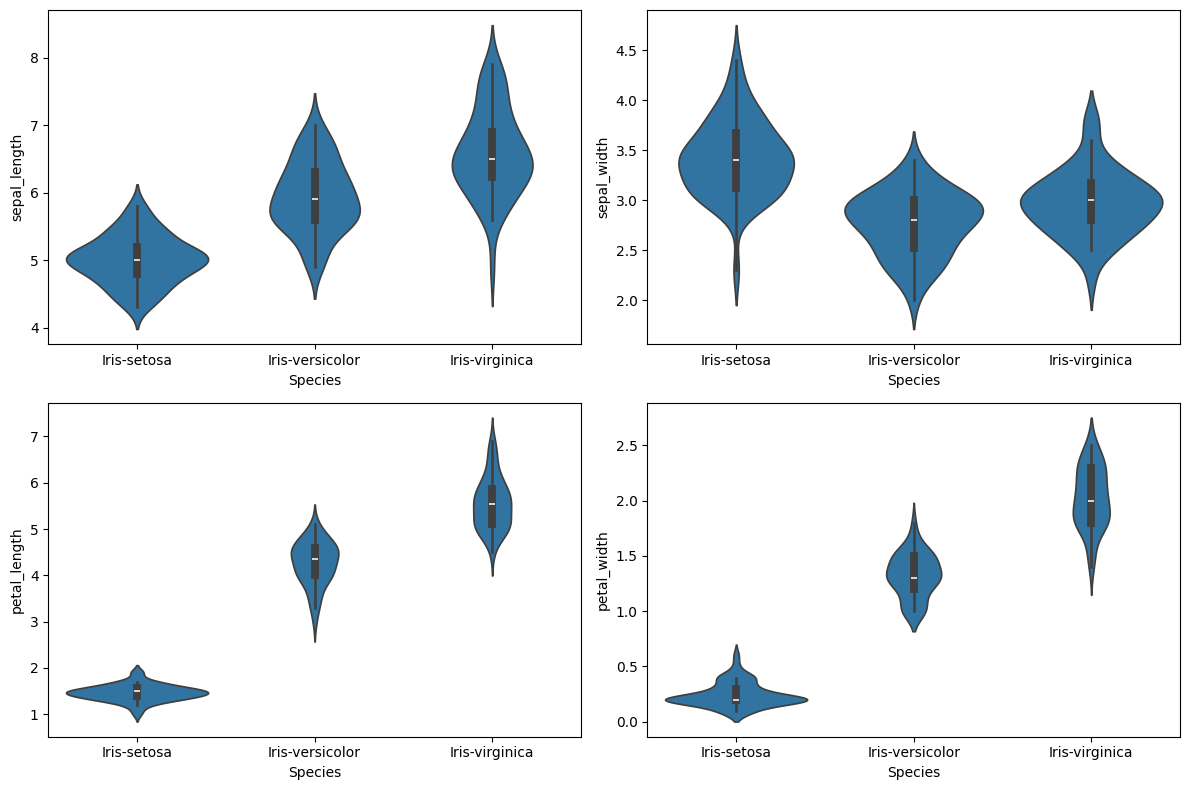

In [55]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(irisdf.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(data=irisdf, x='species', y=feature)
    plt.xlabel('Species')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [56]:
X=irisdf.drop('species', axis=1)
y=irisdf['species']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2,random_state=42)

In [57]:
X_test.shape

(30, 4)

In [58]:
X_train.shape

(120, 4)

In [59]:
y_train.shape

(120,)

In [60]:
y_test.shape

(30,)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [62]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [63]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [65]:
logistic_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()

In [66]:
models = [logistic_model, tree_model, forest_model, svm_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'k-NN']

In [67]:
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy}")

Accuracy of Logistic Regression: 1.0
Accuracy of Decision Tree: 1.0
Accuracy of Random Forest: 1.0
Accuracy of SVM: 1.0
Accuracy of k-NN: 1.0
